In [201]:
import numpy as np
from matplotlib import pyplot as plt

N_A = 1.2e17
N_D = 1.0e17
n_i = 1.08e10

p_p0 = N_A
p_n0 = n_i**2/N_D
n_n0 = N_D
n_p0 = n_i**2/N_A

L_n = 6.68e-3
L_p = 1.24e-2

V_bi = kB_T_over_e*np.log(N_A*N_D/n_i**2)

kB_T = 0.02586
kB_T_over_e = 0.02586
epsilon_0_over_e = 5.527e7
epsilon_over_epsilon_0 = 11.8

def w(V):
    return np.sqrt(2*epsilon_over_epsilon_0*epsilon_0_over_e*((N_D+N_A)/(N_D*N_A))*(V_bi-V))

def w_n(V):
    return N_A/(N_D+N_A)*w(V)

def w_p(V):
    return N_D/(N_D+N_A)*w(V)

x_0 = 0
def x_n(V):
    return x_0 + w_n(V)

def x_p(V):
    return x_0 - w_p(V)

def p(x, V):
    if x < x_p(V):
        return p_p0
    elif x >= x_p(V) and x < x_0:
        return p_p0*np.exp(-N_D/(N_D+N_A)*(V_bi-V)/kB_T_over_e*((x-x_p(V))/(x_0-x_p(V)))**2)
    elif x >= x_0 and x < x_n(V):
        return p_n0*np.exp(V/kB_T_over_e+(N_A/(N_D+N_A))*((V_bi-V)/kB_T_over_e)*((x_n(V)-x)/(x_n(V)-x_0))**2)
    else:
        return p_n0 + p_n0*(np.exp(V/kB_T_over_e)-1)*np.exp(-(x-x_n(V))/L_p)

def n(x, V):
    if x < x_p(V):
        return n_p0 + n_p0*(np.exp(V/kB_T_over_e)-1)*np.exp(-(x_p(V)-x)/L_n)
    elif x >= x_p(V) and x < x_0:
        return n_p0*np.exp(V/kB_T_over_e + (N_D/(N_D+N_A))*((V_bi-V)/kB_T_over_e)*((x-x_p(V))/(x_0-x_p(V)))**2)
    elif x >= x_0 and x < x_n(V):
        return n_n0*np.exp(-N_A/(N_D+N_A)*(V_bi-V)/kB_T_over_e*((x_n(V)-x)/(x_n(V)-x_0))**2)
    else:
        return n_n0

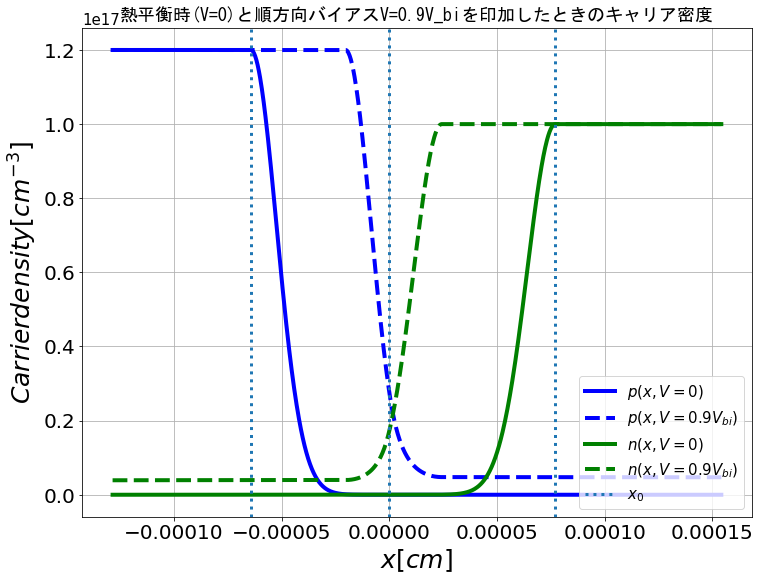

In [206]:
V_th = 0
V_bias = 0.9*V_bi
x = np.linspace(2*x_p(V), 2*x_n(V), 1000)
p_plot_0 = [p(i, V_th) for i in x]
p_plot_V = [p(i, V_bias) for i in x]
n_plot_0 = [n(i, V_th) for i in x]
n_plot_V = [n(i, V_bias) for i in x]

fig = plt.figure(figsize=(12,9))
plt.plot(x, p_plot_0, label=r'$p(x, V=0)$', color='blue',linewidth=4)
plt.plot(x, p_plot_V, label=r'$p(x, V=0.9V_{bi})$', linestyle='--', color='blue',linewidth=4)
plt.plot(x, n_plot_0, label=r'$n(x, V=0)$', color='green',linewidth=4)
plt.plot(x, n_plot_V, label=r'$n(x, V=0.9V_{bi})$', linestyle='--', color='green',linewidth=4)

plt.xlabel(r'$x[cm]$',fontsize=25)
plt.ylabel(r'$Carrier density[cm^{-3}]$', fontsize=25)
plt.title('熱平衡時(V=0)と順方向バイアスV=0.9V_biを印加したときのキャリア密度', fontname="MS Gothic", fontsize=18)
plt.grid()
plt.axvline(x=0, linestyle=':', label=r'$x_0$',linewidth=3)
plt.axvline(x=x_n(V), linestyle=':',linewidth=3)
plt.axvline(x=x_p(V), linestyle=':',linewidth=3)
plt.legend(loc='lower right', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rc('font', size=15)

plt.show()

fig.savefig('./carrier-density.png')